In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

In [88]:
student_mat_dataframe = pd.read_csv("student-mat.csv")

In [89]:
print(student_mat_dataframe.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [90]:
print(student_mat_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [91]:
student_mat_dataframe.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [92]:
student_mat_dataframe.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Columns
##### A) school: Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
##### A) sex: Student's sex (binary: 'F' - female or 'M' - male)
##### age: Student's age (numeric: from 15 to 22)
##### A) addressStudent's home address type (binary: 'U' - urban or 'R' - rural)
##### A) famsizeFamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
##### A) Pstatus: Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)
##### Medu: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
##### Fedu: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
##### Mjob: Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
##### Fjob: Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
##### reason: Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
##### guardian: Student's guardian (nominal: 'mother', 'father' or 'other')
##### traveltime: Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
##### studytime: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
##### failures: Number of past class failures (numeric: n if 1<=n<3, else 4)
##### schoolsup: Extra educational support (binary: yes or no)
##### famsup: Family educational support (binary: yes or no)
##### paid: Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
##### activities: Extra-curricular activities (binary: yes or no)
##### nursery: Attended nursery school (binary: yes or no)
##### higher: Wants to take higher education (binary: yes or no)
##### internet: Internet access at home (binary: yes or no)
##### romantic: With a romantic relationship (binary: yes or no)
##### famrel: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
##### freetime: Free time after school (numeric: from 1 - very low to 5 - very high)
##### goout: Going out with friends (numeric: from 1 - very low to 5 - very high)
##### Dalc: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
##### Walc: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
##### health: Current health status (numeric: from 1 - very bad to 5 - very good)
##### absences: Number of school absences (numeric: from 0 to 93)
##### G1: First period grade (numeric: from 0 to 20)
##### G2: Second period grade (numeric: from 0 to 20)
##### G3: Final grade (numeric: from 0 to 20, output target)

In [93]:
trace1 = go.Box(
    y = student_mat_dataframe.Dalc,
    name = "Daily alcohol consumption",
    marker = dict(color = "darkred")
)
trace2 = go.Box(
    y = student_mat_dataframe.Walc,
    name = "Weekly  alcohol consumption",
    marker = dict(color = "teal")
)
concatTrace = [trace1,trace2]
iplot(concatTrace)

In [94]:
plt.figure(figsize=[10,10])

trace = go.Scatter3d(
    x = student_mat_dataframe.age,
    y = student_mat_dataframe.Dalc,
    z = student_mat_dataframe.Walc,
    mode = 'markers',
    marker = dict(
        size = 10,
        color = student_mat_dataframe.age,
        colorscale = 'Rainbow'
    )
)
dataTrace = [trace]
layoutTrace = go.Layout(
    margin = dict(
    l = 0,
    r = 0,
    b = 0,
    t = 0 )
)
figTrace = go.Figure(data=dataTrace, layout=layoutTrace)
iplot(figTrace)

<Figure size 720x720 with 0 Axes>

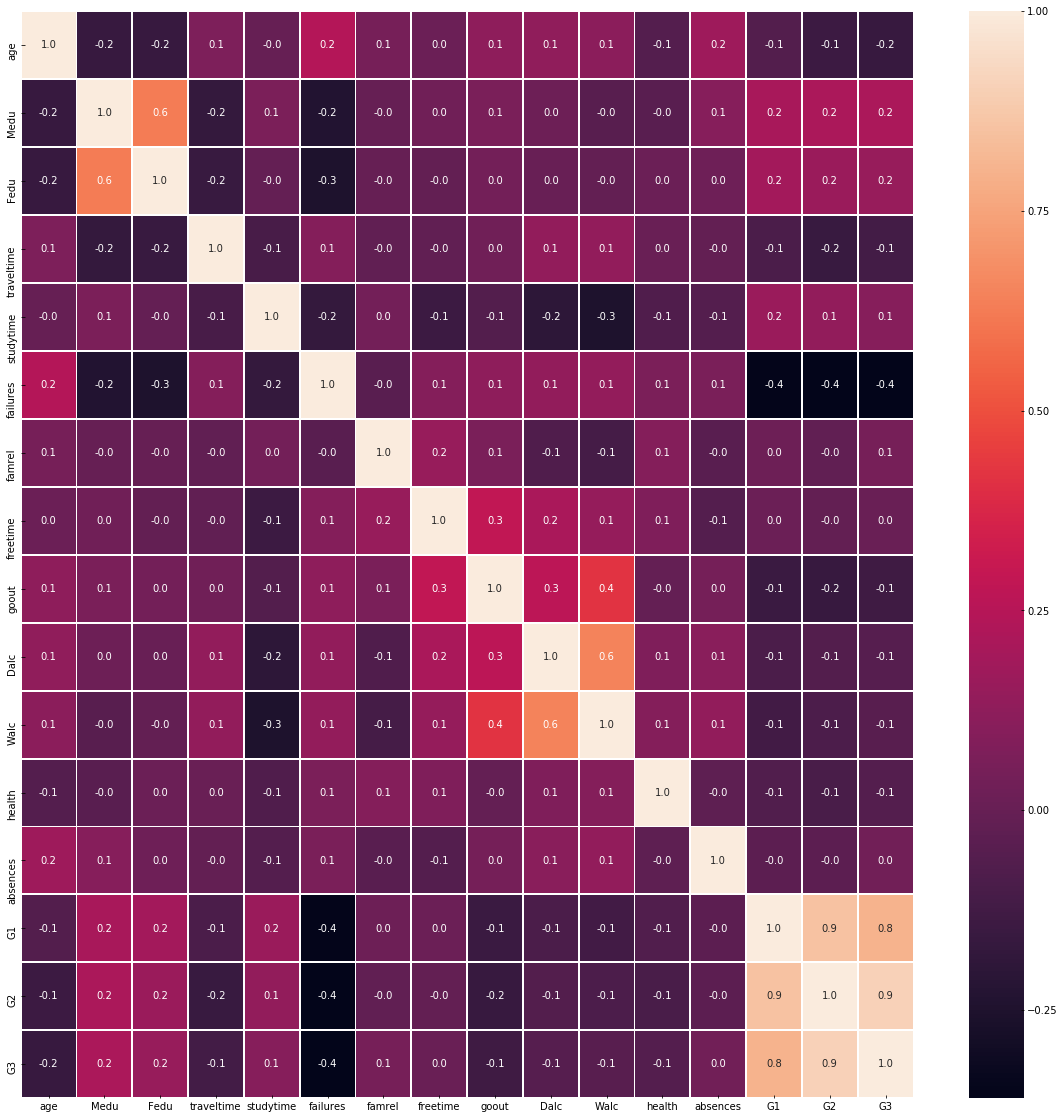

In [95]:
#correlation for dataset
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(student_mat_dataframe.corr(),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

In [96]:
school_list = list(student_mat_dataframe.school.unique())
print(school_list)

['GP', 'MS']


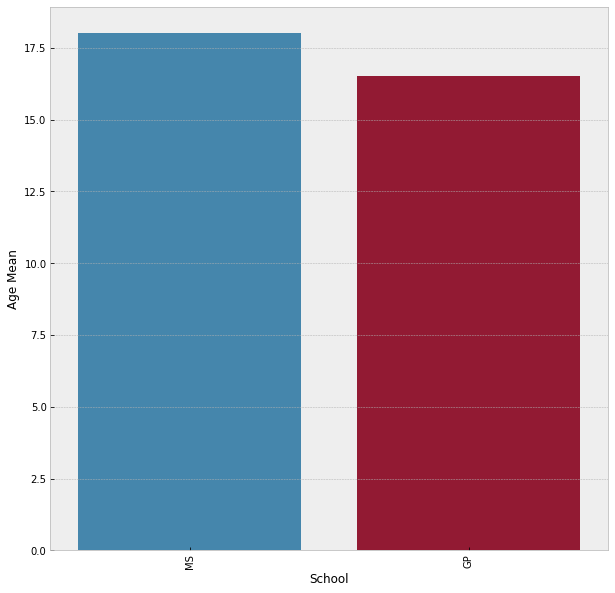

In [97]:
# the average age at two schools

school_list = list(student_mat_dataframe.school.unique())
age_mean = []
for i in school_list:
    x = student_mat_dataframe[student_mat_dataframe.school == i]
    age_sum = sum(x.age)/len(x)
    age_mean.append(age_sum)

#sorting
data = pd.DataFrame({'school_list':school_list,'age_mean':age_mean})
new_index = (data['age_mean'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

#visualization
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data['school_list'],y=sorted_data['age_mean'])
plt.xticks(rotation=90)
plt.xlabel("School")
plt.ylabel("Age Mean")
plt.show()


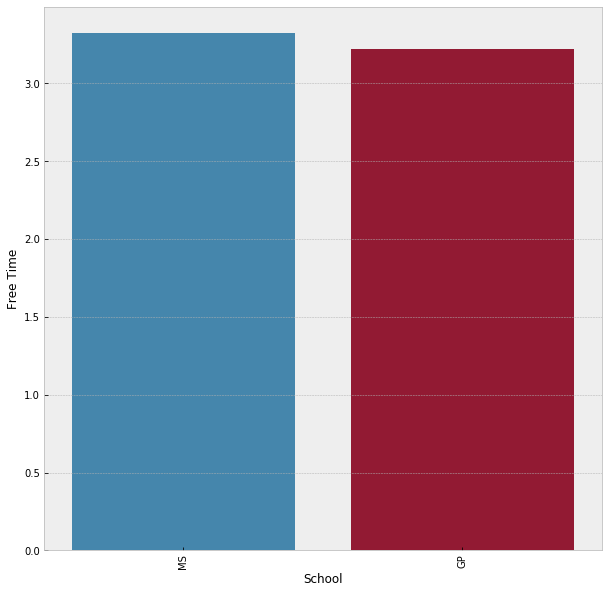

In [98]:
# Below is the average timeout graph for schools shown
school_list = list(student_mat_dataframe.school.unique())
free_time = []
for i in school_list:
    x = student_mat_dataframe[student_mat_dataframe.school == i]
    freeTime = sum(x.freetime)/len(x)
    free_time.append(freeTime)

#sorting
data = pd.DataFrame({'school_list':school_list,'free_time':free_time})
new_index = (data['free_time'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data2['school_list'],y=sorted_data2['free_time'])
plt.xticks(rotation=90)
plt.xlabel("School")
plt.ylabel("Free Time")
plt.show()

In [99]:
fatherJobs_Unique = list(student_mat_dataframe.Fjob.unique())
print(fatherJobs_Unique)

['teacher', 'other', 'services', 'health', 'at_home']


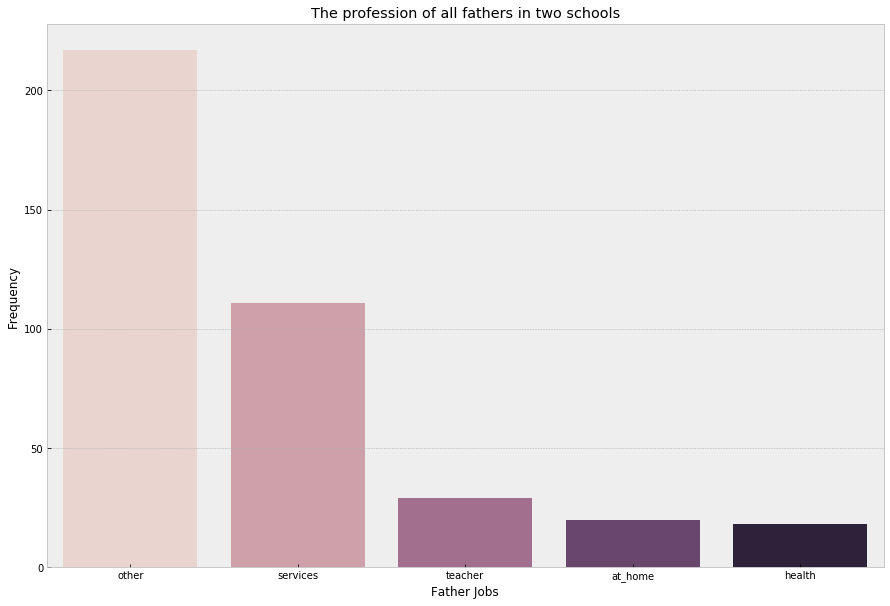

In [100]:
fatherJobs_xAxis = list(student_mat_dataframe.Fjob.unique())
fatherJobs_list = list(student_mat_dataframe.Fjob)
fJobsCounter = Counter(fatherJobs_list)
most_common_jobs = fJobsCounter.most_common(5)
x,y = zip(*most_common_jobs)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Father Jobs")
plt.ylabel("Frequency")
plt.title("The profession of all fathers in two schools")
plt.show()

In [101]:
motherJobs_Unique = list(student_mat_dataframe.Mjob.unique())
print(motherJobs_Unique)

['at_home', 'health', 'other', 'services', 'teacher']


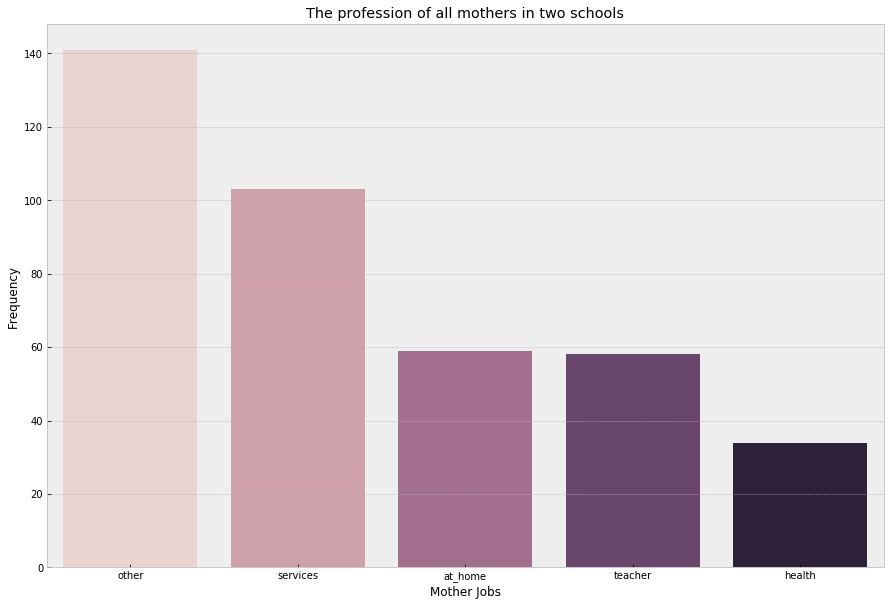

In [102]:
motherJobs_xAxis = list(student_mat_dataframe.Mjob.unique())
motherJobs_list = list(student_mat_dataframe.Mjob)
mJobsCounter = Counter(motherJobs_list)
most_common_jobs = mJobsCounter.most_common(5)
x,y = zip(*most_common_jobs)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Mother Jobs")
plt.ylabel("Frequency")
plt.title("The profession of all mothers in two schools")
plt.show()

###### The sum of the places where children between 15 and 22 live with family members or live alone

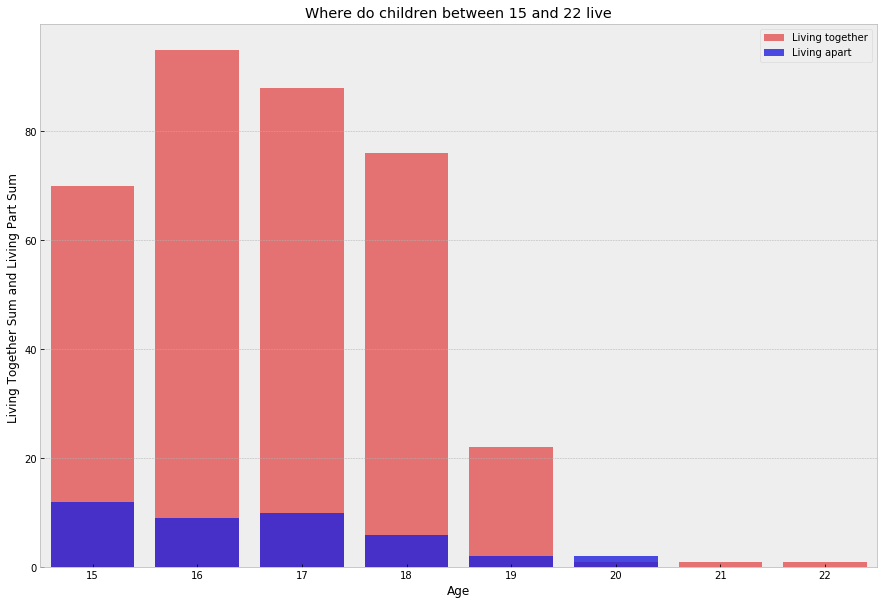

In [103]:
ageList = list(student_mat_dataframe.age.unique())

parentStatusT = []
parentStatusA = []

for i in ageList:
    x = student_mat_dataframe[student_mat_dataframe.age == i]
    parentStatusT.append(sum(x.Pstatus == "T"))
    parentStatusA.append(sum(x.Pstatus == "A"))
    
#sorting
sort_data2 = pd.DataFrame({'student_age':ageList,'student_status':parentStatusA})
new_index4 = (sort_data2['student_status'].sort_values(ascending=False)).index
sorted_data4 = sort_data2.reindex(new_index4)

f,ax = plt.subplots(figsize=(15,10))
sns.barplot(x=ageList,y=parentStatusT,color="red",alpha=0.6,label="Living together")
sns.barplot(x=ageList,y=parentStatusA,color="blue",alpha=0.8,label="Living apart")
ax.legend(loc="upper right",frameon=True)
ax.set(xlabel="Age",ylabel="Living Together Sum and Living Part Sum ",title="Where do children between 15 and 22 live")
plt.show()

In [104]:
print(sorted_data.head())
print(sorted_data2.head())

  school_list   age_mean
1          MS  18.021739
0          GP  16.521490
  school_list  free_time
1          MS   3.326087
0          GP   3.223496


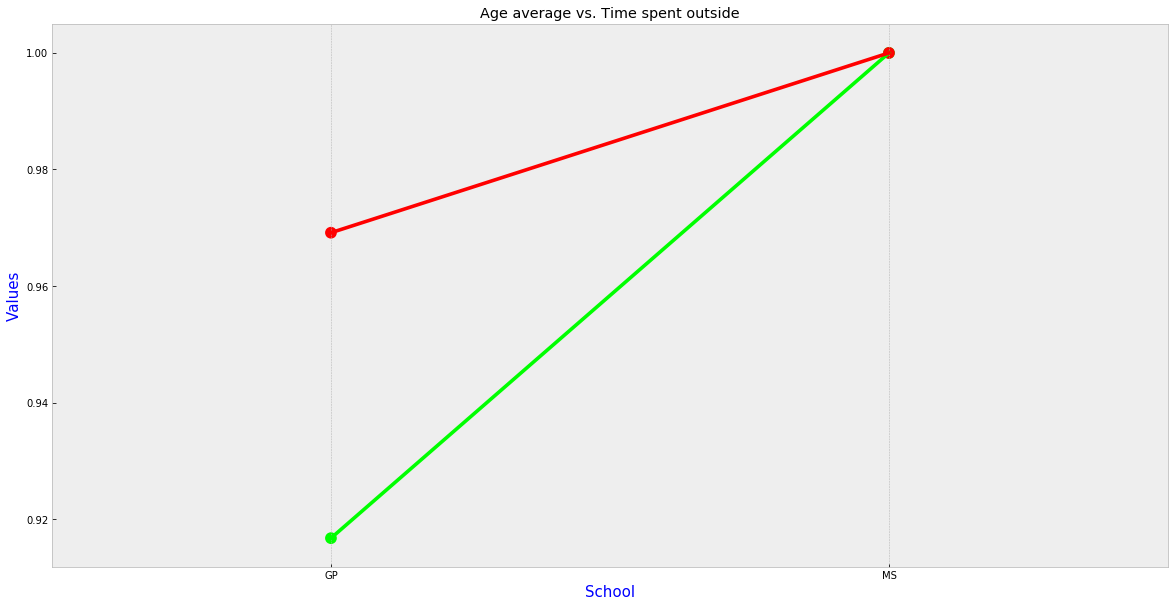

In [105]:
#Standardization
sorted_data['age_mean'] = sorted_data['age_mean']/max(sorted_data['age_mean'])
sorted_data2['free_time'] = sorted_data2['free_time']/max(sorted_data2['free_time'])

#Data Concat
data = pd.concat([sorted_data,sorted_data2['free_time']],axis=1)
data.sort_values('age_mean',inplace=True)


#Visualization
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='school_list',y='age_mean',data=data,color='lime',alpha=0.6)
sns.pointplot(x='school_list',y='free_time',data=data,color='red',alpha=0.8)
plt.xlabel("School",fontsize=15,color='blue')
plt.ylabel("Values",fontsize=15,color='blue')
plt.title("Age average vs. Time spent outside")
plt.grid()

#Red: Free Time, Lime: Age Mean

C:\Users\KIIT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\KIIT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



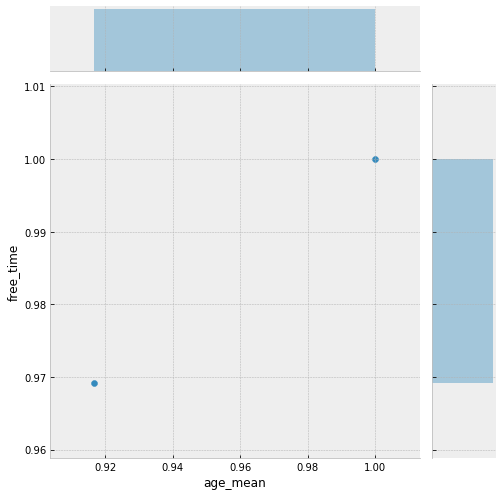

In [106]:
g = sns.jointplot(data.age_mean,data.free_time,size=7)
plt.show()

In [107]:
labels = student_mat_dataframe.health.value_counts()
print(labels)

5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64


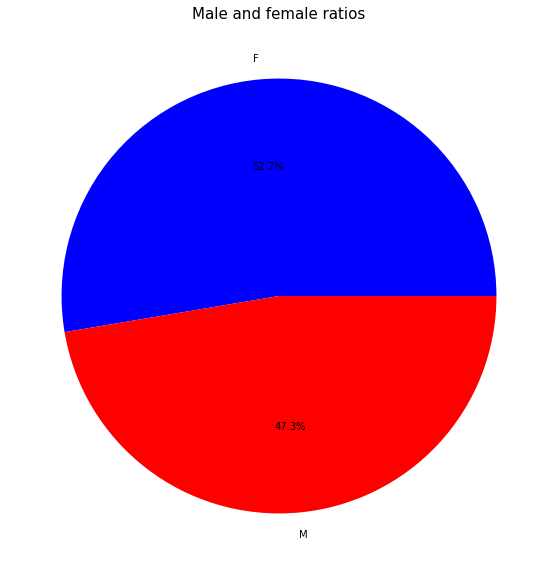

In [108]:
labelsSex = student_mat_dataframe.sex.value_counts().index
colorsSex = ['blue','red']
explodeSex = [0,0]
valuesSex = student_mat_dataframe.sex.value_counts().values

#Visualitizion
plt.figure(figsize=(10,10))
plt.pie(valuesSex,explode=explodeSex,labels=labelsSex,colors=colorsSex,autopct='%1.1f%%')
plt.title("Male and female ratios",color="black",fontsize=15)
plt.show()

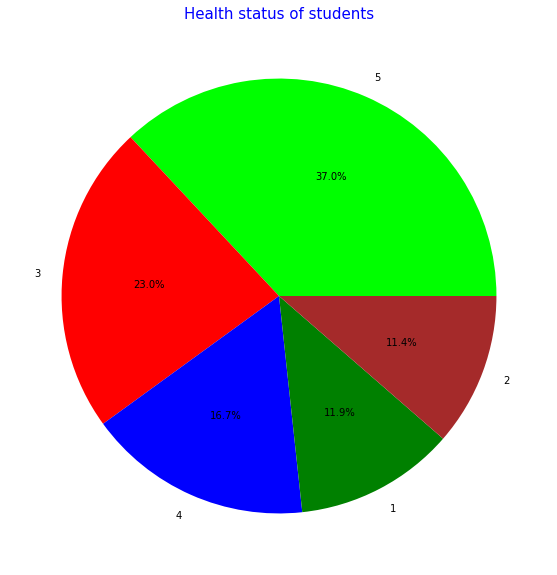

In [109]:
labels = student_mat_dataframe.health.value_counts().index 
colors = ['lime','red','blue','green','brown']
explode = [0,0,0,0,0]
values = student_mat_dataframe.health.value_counts().values 

#Visualitizion
plt.figure(figsize=(10,10))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Health status of students",color="blue",fontsize=15)
plt.show()

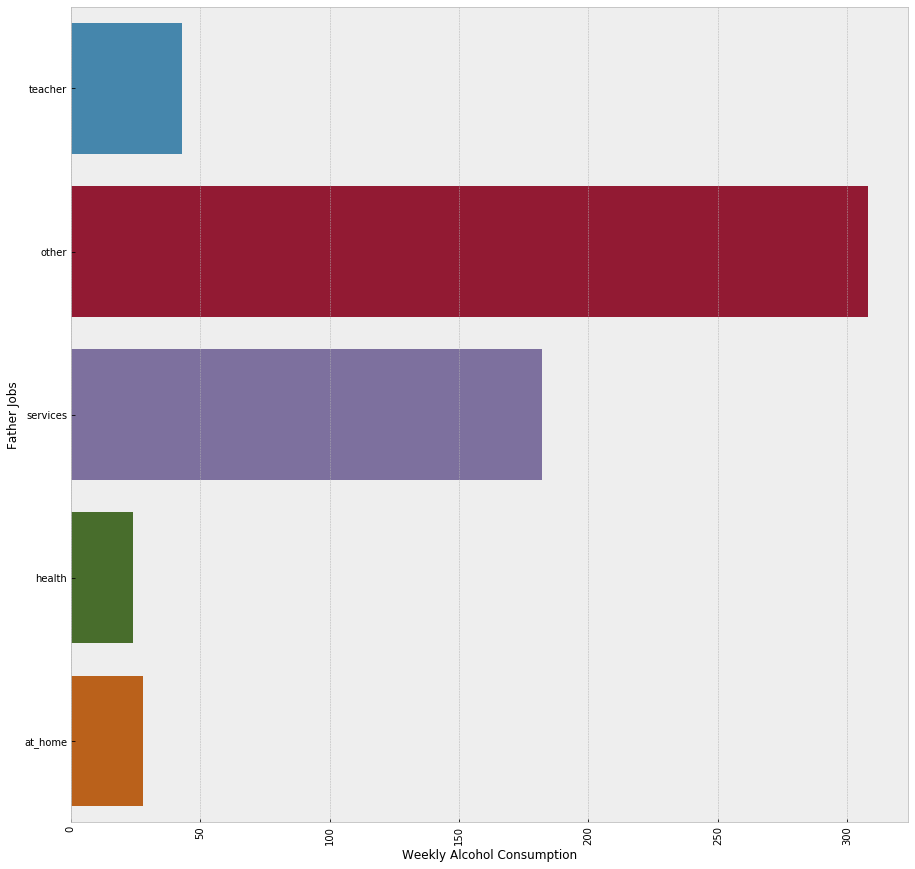

In [110]:
fatherJobsList = list(student_mat_dataframe.Fjob.unique())
FstudentDalc = []
for each in fatherJobsList:
    x = student_mat_dataframe[student_mat_dataframe.Fjob == each]
    FstudentDalc.append(sum(x.Dalc))

#sorting
sort_data = pd.DataFrame({'father_jobs':fatherJobsList,'student_dalc':FstudentDalc})
new_index3 = (sort_data['student_dalc'].sort_values(ascending=False)).index
sorted_data3 = sort_data.reindex(new_index3)

#Visualitizon    
plt.figure(figsize=(15,15))
sns.barplot(x=FstudentDalc,y=fatherJobsList)
plt.xticks(rotation=90)
plt.xlabel("Weekly Alcohol Consumption")
plt.ylabel("Father Jobs")
plt.show()

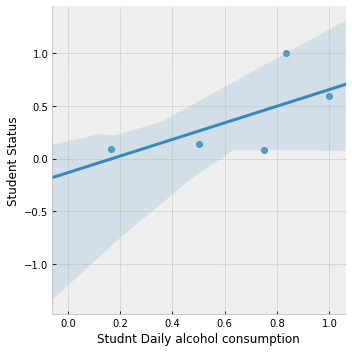

In [111]:
#Standardization
sorted_data3['student_dalc'] = sorted_data3['student_dalc']/max(sorted_data3['student_dalc'])
sorted_data4['student_status'] = sorted_data4['student_status']/max(sorted_data4['student_status'])

#Data Concat
data = pd.concat([sorted_data3,sorted_data4['student_status']],axis=1)
data.sort_values('student_dalc',inplace=True)

sns.lmplot(x="student_status",y="student_dalc",data=data)
plt.xlabel('Studnt Daily alcohol consumption')
plt.ylabel('Student Status')
plt.show()

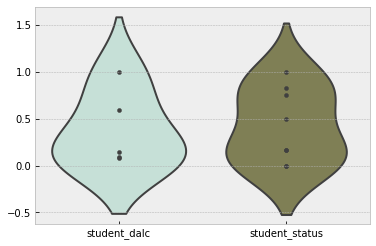

In [112]:
pal = sns.cubehelix_palette(2,rot=-5,dark=.5)
sns.violinplot(data=data,palette=pal,inner='points')
plt.show()

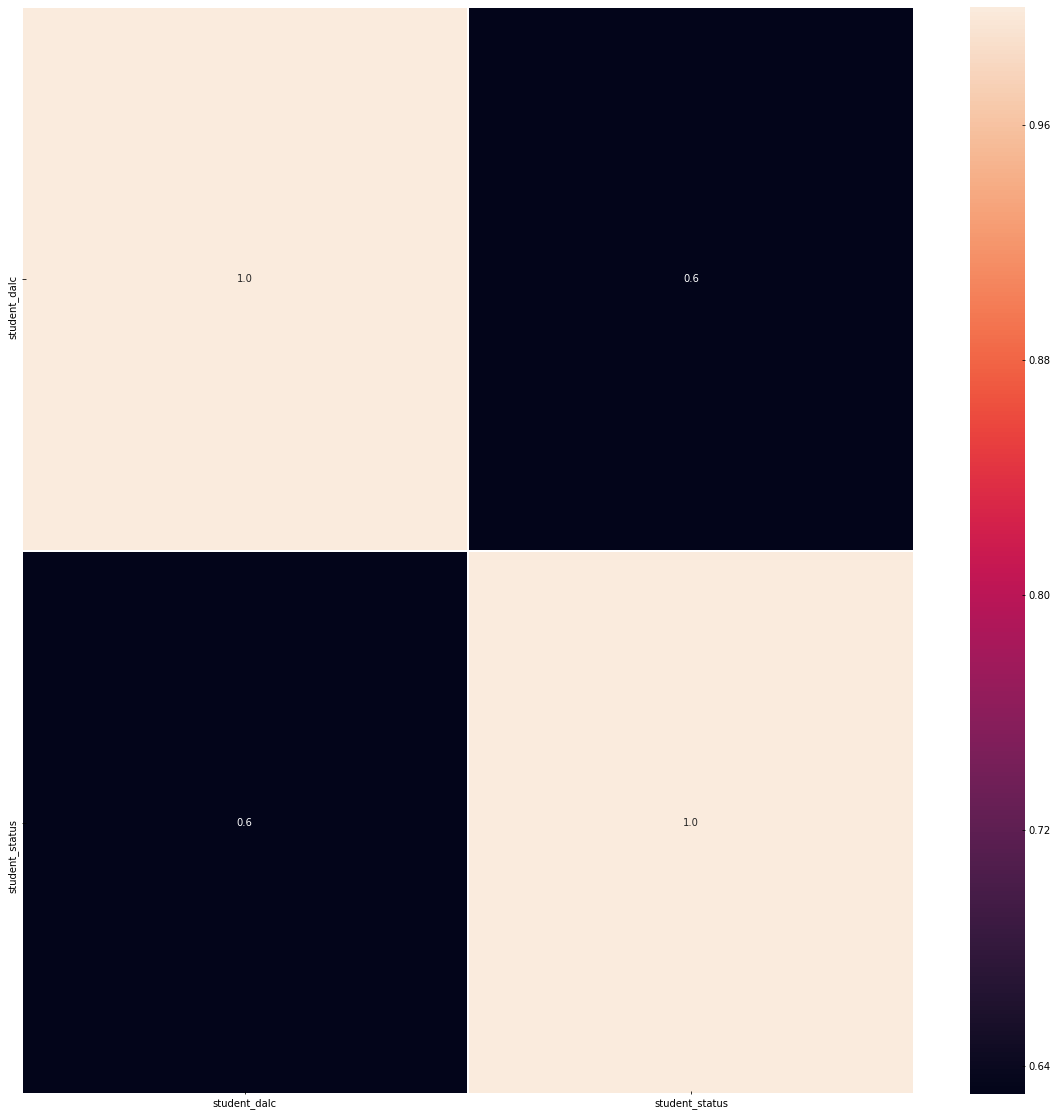

In [113]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

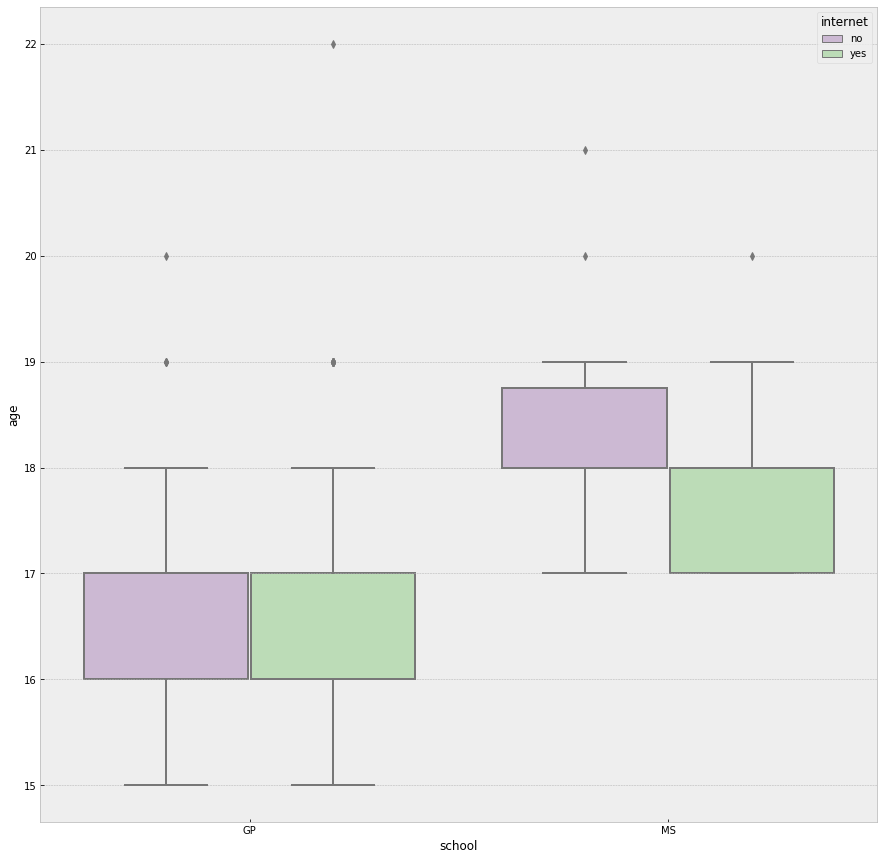

In [114]:
plt.figure(figsize=(15,15))
sns.boxplot(x="school",y="age",hue="internet",data=student_mat_dataframe,palette="PRGn")
plt.show()

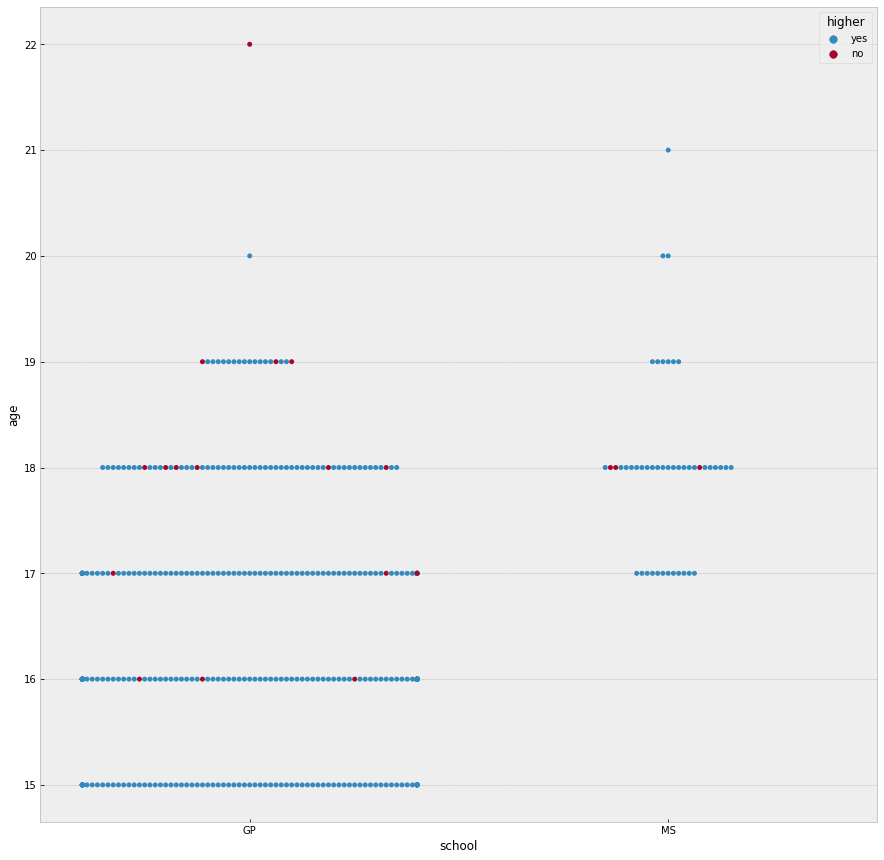

In [115]:
plt.figure(figsize=(15,15))
sns.swarmplot(x="school",y="age",hue="higher",data=student_mat_dataframe)
plt.show()

In [116]:
l=[1,2,3,4,5] #Alcohol consumption level
labels="1-Very Low","2-Low","3-Medium","4-High","5-Very High"

### Examine 15 years old

In [117]:
age15=student_mat_dataframe[(student_mat_dataframe.age==15)]
age15.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,15.0,3.036585,2.756098,1.365854,2.158537,0.268293,4.000000,3.280488,2.743902,1.353659,1.902439,3.585366,3.341463,11.231707,11.365854,11.256098
std,0.0,1.059293,1.095005,0.711670,0.961859,0.737844,0.888889,1.009515,1.063548,0.743232,1.202977,1.555168,4.074066,3.341836,4.129126,4.596861
min,15.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,15.0,2.000000,2.000000,1.000000,1.250000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.250000,0.000000,8.250000,9.000000,9.250000
50%,15.0,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,4.000000,2.000000,10.500000,11.000000,11.000000
75%,15.0,4.000000,4.000000,2.000000,3.000000,0.000000,5.000000,4.000000,3.000000,1.000000,3.000000,5.000000,6.000000,14.000000,14.000000,15.000000
max,15.0,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.000000,19.000000,19.000000,19.000000


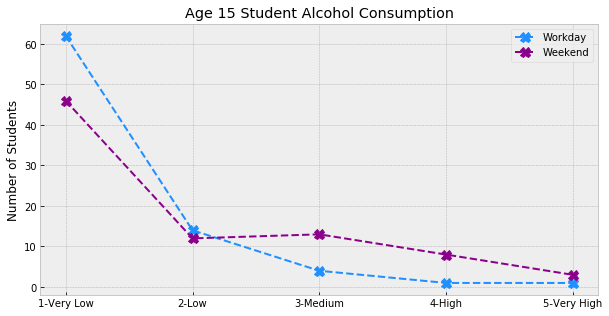

In [118]:
age15_workday=list(map(lambda l: list(age15.Dalc).count(l),l))
age15_weekend=list(map(lambda l: list(age15.Walc).count(l),l))
plt.style.use("bmh")
plt.figure(figsize=(10,5))
plt.plot(labels,age15_workday,color="dodgerblue",linestyle="--",marker="X", markersize=10,label="Workday")
plt.plot(labels,age15_weekend,color="darkmagenta",linestyle="--",marker="X", markersize=10,label="Weekend")
plt.title("Age 15 Student Alcohol Consumption")
plt.ylabel("Number of Students")
plt.legend()

plt.show()

## 16 years old

In [119]:
age16=student_mat_dataframe[(student_mat_dataframe.age==16)]
age16.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,16.0,2.826923,2.576923,1.403846,1.875000,0.230769,3.836538,3.230769,3.173077,1.432692,2.278846,3.701923,5.451923,10.942308,11.182692,11.028846
std,0.0,1.037569,1.049200,0.675784,0.784405,0.611075,0.976526,0.937159,1.101123,0.878706,1.339879,1.335692,7.307238,3.234603,3.694037,4.282402
min,16.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.0,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,9.000000
50%,16.0,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.500000,11.000000
75%,16.0,4.000000,3.000000,2.000000,2.000000,0.000000,4.250000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,14.000000,14.000000
max,16.0,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,54.000000,19.000000,19.000000,20.000000


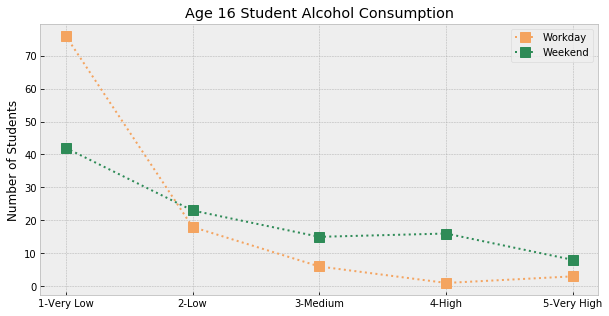

In [120]:
age16_workday=list(map(lambda l: list(age16.Dalc).count(l),l))
age16_weekend=list(map(lambda l: list(age16.Walc).count(l),l))
plt.style.use("bmh")
plt.figure(figsize=(10,5))
plt.plot(labels,age16_workday,color="sandybrown",linestyle=":",marker="s", markersize=10,label="Workday")
plt.plot(labels,age16_weekend,color="seagreen",linestyle=":",marker="s", markersize=10,label="Weekend")
plt.title("Age 16 Student Alcohol Consumption")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

## 17 years old

In [121]:
age17=student_mat_dataframe[(student_mat_dataframe.age==17)]
age17.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,17.0,2.612245,2.469388,1.459184,2.020408,0.244898,3.908163,3.22449,3.204082,1.520408,2.571429,3.500000,6.459184,10.897959,10.479592,10.275510
std,0.0,1.099509,1.076498,0.676077,0.786216,0.689557,0.862587,1.06035,1.174990,0.899365,1.251803,1.386608,8.498840,3.215586,3.482592,4.290437
min,17.0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,17.0,2.000000,2.000000,1.000000,1.250000,0.000000,3.000000,2.25000,2.000000,1.000000,1.250000,3.000000,1.250000,8.250000,9.000000,9.000000
50%,17.0,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,17.0,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.00000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,12.750000,13.000000
max,17.0,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,56.000000,18.000000,18.000000,18.000000


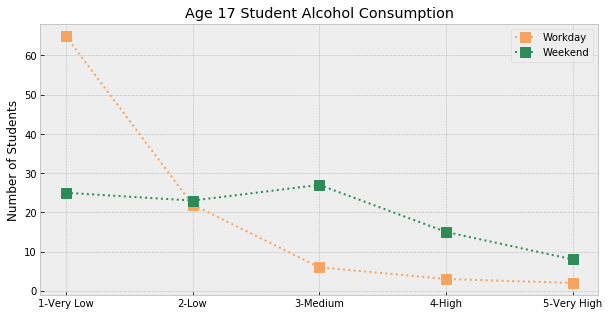

In [122]:
age17_workday=list(map(lambda l: list(age17.Dalc).count(l),l))
age17_weekend=list(map(lambda l: list(age17.Walc).count(l),l))
plt.style.use("bmh")
plt.figure(figsize=(10,5))
plt.plot(labels,age17_workday,color="sandybrown",linestyle=":",marker="s", markersize=10,label="Workday")
plt.plot(labels,age17_weekend,color="seagreen",linestyle=":",marker="s", markersize=10,label="Weekend")
plt.title("Age 17 Student Alcohol Consumption")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

## 18 years old

In [123]:
age18=student_mat_dataframe[(student_mat_dataframe.age==18)]
age18.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000
mean,18.0,2.707317,2.475610,1.585366,2.146341,0.292683,4.02439,3.121951,3.304878,1.548780,2.414634,3.439024,6.048780,10.719512,10.134146,9.54878
std,0.0,1.105405,1.124647,0.736210,0.833288,0.618397,0.88855,0.921489,1.050444,0.944803,1.314226,1.324951,9.395169,3.553035,3.796562,4.99420
min,18.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.00000
25%,18.0,2.000000,1.250000,1.000000,2.000000,0.000000,4.00000,3.000000,3.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,8.00000
50%,18.0,3.000000,2.000000,1.000000,2.000000,0.000000,4.00000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,10.000000,10.000000,10.00000
75%,18.0,4.000000,3.000000,2.000000,3.000000,0.000000,5.00000,4.000000,4.000000,2.000000,3.000000,5.000000,8.750000,13.000000,13.000000,13.00000
max,18.0,4.000000,4.000000,4.000000,4.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,18.000000,19.00000


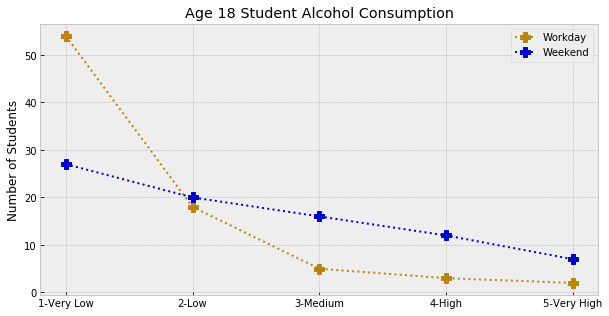

In [124]:
age18_workday=list(map(lambda l: list(age18.Dalc).count(l),l))
age18_weekend=list(map(lambda l: list(age18.Walc).count(l),l))
plt.style.use("bmh")
plt.figure(figsize=(10,5))
plt.plot(labels,age18_workday,color="darkgoldenrod",linestyle="dotted",marker="P", markersize=10,label="Workday")
plt.plot(labels,age18_weekend,color="mediumblue",linestyle="dotted",marker="P", markersize=10,label="Weekend")
plt.legend()
plt.ylabel("Number of Students")
plt.title("Age 18 Student Alcohol Consumption")
plt.show()

## 19 year old

In [125]:
age19=student_mat_dataframe[(student_mat_dataframe.age==19)]
age19.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,19.0,2.166667,2.041667,1.458333,2.083333,1.166667,3.875000,3.250000,2.916667,1.458333,1.958333,3.500000,10.458333,10.250000,9.250000,8.208333
std,0.0,1.167184,1.041703,0.721060,0.775532,0.916831,0.679674,1.151558,1.100066,0.779028,0.858673,1.318761,11.394046,3.151949,3.096281,4.606037
min,19.0,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,19.0,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.750000,2.000000,1.000000,1.000000,3.000000,1.500000,8.000000,8.000000,8.000000
50%,19.0,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,6.500000,9.500000,9.000000,9.000000
75%,19.0,3.000000,3.000000,2.000000,2.250000,1.250000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,15.750000,13.000000,11.250000,11.000000
max,19.0,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,40.000000,15.000000,14.000000,13.000000


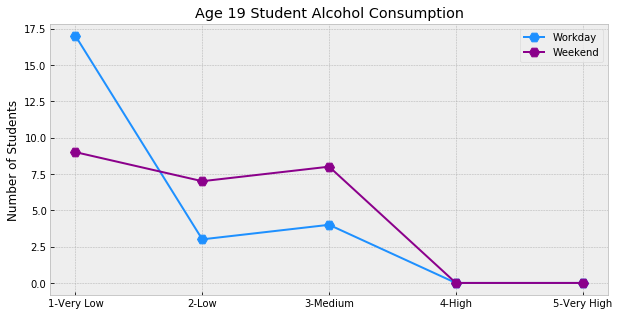

In [126]:
age19_workday=list(map(lambda l: list(age19.Dalc).count(l),l))
age19_weekend=list(map(lambda l: list(age19.Walc).count(l),l))
plt.style.use("bmh")
plt.figure(figsize=(10,5))
plt.plot(labels,age19_workday,color="dodgerblue",marker="H", markersize=10,label="Workday")
plt.plot(labels,age19_weekend,color="darkmagenta",marker="H", markersize=10,label="Weekend")
plt.legend()
plt.ylabel("Number of Students")
plt.title("Age 19 Student Alcohol Consumption")
plt.show()

## 20 years old

In [127]:
age20=student_mat_dataframe[(student_mat_dataframe.age==20)]
age20.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000
mean,20.0,3.0,2.0,1.333333,2.0,1.333333,5.0,4.666667,3.333333,2.000000,2.333333,4.0,5.000000,13.666667,13.666667,14.000000
std,0.0,1.0,0.0,0.577350,1.0,1.154701,0.0,0.577350,0.577350,1.732051,2.309401,1.0,5.567764,4.163332,4.509250,4.582576
min,20.0,2.0,2.0,1.000000,1.0,0.000000,5.0,4.000000,3.000000,1.000000,1.000000,3.0,0.000000,9.000000,9.000000,9.000000
25%,20.0,2.5,2.0,1.000000,1.5,1.000000,5.0,4.500000,3.000000,1.000000,1.000000,3.5,2.000000,12.000000,11.500000,12.000000
50%,20.0,3.0,2.0,1.000000,2.0,2.000000,5.0,5.000000,3.000000,1.000000,1.000000,4.0,4.000000,15.000000,14.000000,15.000000
75%,20.0,3.5,2.0,1.500000,2.5,2.000000,5.0,5.000000,3.500000,2.500000,3.000000,4.5,7.500000,16.000000,16.000000,16.500000
max,20.0,4.0,2.0,2.000000,3.0,2.000000,5.0,5.000000,4.000000,4.000000,5.000000,5.0,11.000000,17.000000,18.000000,18.000000


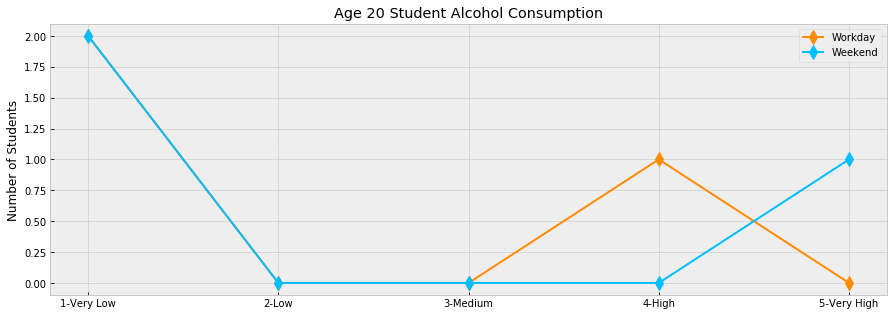

In [128]:
age20_workday=list(map(lambda l: list(age20.Dalc).count(l),l))
age20_weekend=list(map(lambda l: list(age20.Walc).count(l),l))
plt.style.use("bmh")
plt.figure(figsize=(15,5))
plt.plot(labels,age20_workday,color="darkorange",marker="d", markersize=10,label="Workday")
plt.plot(labels,age20_weekend,color="deepskyblue",marker="d", markersize=10,label="Weekend")
plt.legend()
plt.ylabel("Number of Students")
plt.title("Age 20 Student Alcohol Consumption")
plt.show()

## 21 years old

In [129]:
age21=student_mat_dataframe[(student_mat_dataframe.age==21)]
age21.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
25%,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
50%,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
75%,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
max,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0


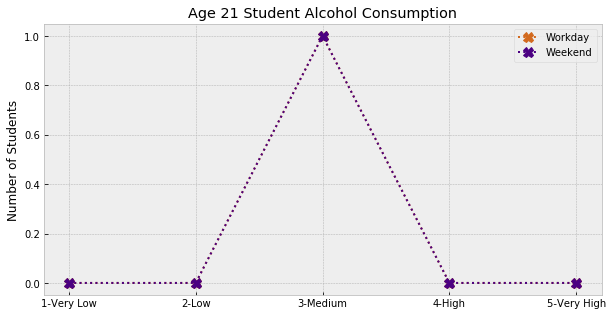

In [130]:
age21_workday=list(map(lambda l: list(age21.Dalc).count(l),l))
age21_weekend=list(map(lambda l: list(age21.Walc).count(l),l))
plt.figure(figsize=(10,5))
plt.plot(labels,age21_workday,color="chocolate",linestyle=":",linewidth=2,marker="X", markersize=10,label="Workday")
plt.plot(labels,age21_weekend,color="indigo",linestyle=":",linewidth=2,marker="X", markersize=10,label="Weekend")
plt.legend()
plt.style.use("bmh")
plt.ylabel("Number of Students")
plt.title("Age 21 Student Alcohol Consumption")
plt.show()

## SEX

In [131]:
female=student_mat_dataframe[student_mat_dataframe.sex=="F"]
male= student_mat_dataframe[student_mat_dataframe.sex=="M"]

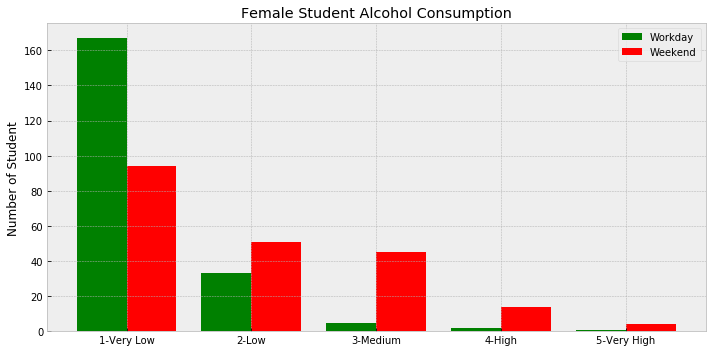

In [132]:
female_workday= list(map(lambda l: list(female.Dalc).count(l),l))
female_weekend= list(map(lambda l: list(female.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, female_workday, w, color="g")
plot2= plt.bar(i+w, female_weekend, w, color="r" )

plt.ylabel('Number of Student')
plt.title('Female Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.style.use("bmh")
plt.show()

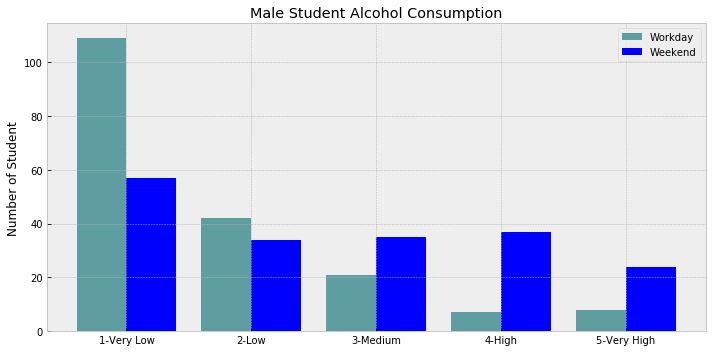

In [133]:
male_workday= list(map(lambda l: list(male.Dalc).count(l),l))
male_weekend= list(map(lambda l: list(male.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, male_workday, w, color="cadetblue")
plot2= plt.bar(i+w,male_weekend, w, color="b" )

plt.ylabel("Number of Student")
plt.title("Male Student Alcohol Consumption")
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.style.use("bmh")
plt.show()

In [134]:
GP=student_mat_dataframe[student_mat_dataframe.school=="GP"]
MS= student_mat_dataframe[student_mat_dataframe.school=="MS"]

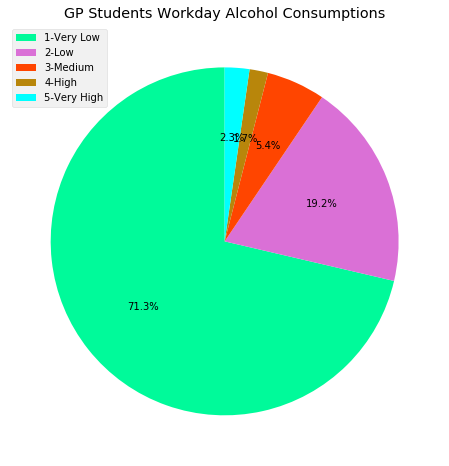

In [135]:
GP_workday= list(map(lambda l: list(GP.Dalc).count(l),l))

colors="mediumspringgreen","orchid","orangered","darkgoldenrod","aqua"
plt.figure(figsize=(8,8))
plt.pie(GP_workday,colors=colors,autopct='%1.1f%%', startangle=90)
plt.title("GP Students Workday Alcohol Consumptions")
plt.legend(labels)
plt.show()

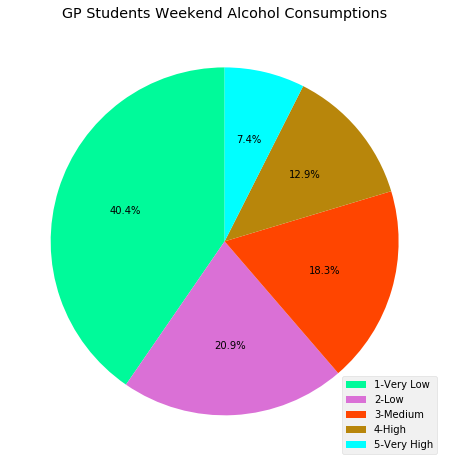

In [136]:
GP_weekend= list(map(lambda l: list(GP.Walc).count(l),l))

plt.figure(figsize=(8,8))
plt.pie(GP_weekend,colors=colors,autopct='%1.1f%%', startangle=90)
plt.title("GP Students Weekend Alcohol Consumptions")
plt.legend(labels)
plt.show()

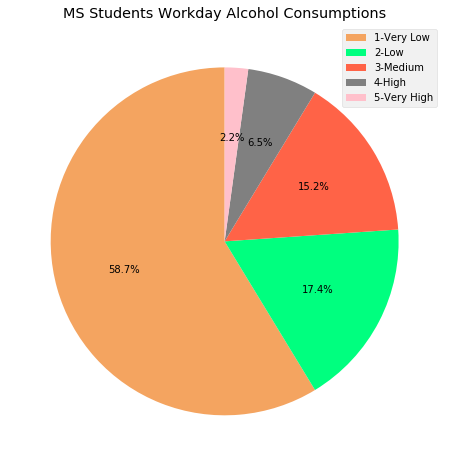

In [137]:
MS_workday= list(map(lambda l: list(MS.Dalc).count(l),l))
colors2="sandybrown","springgreen","tomato","grey","pink"
plt.figure(figsize=(8,8))
plt.pie(MS_workday,colors=colors2,autopct='%1.1f%%', startangle=90)
plt.title("MS Students Workday Alcohol Consumptions")
plt.legend(labels)
plt.show()

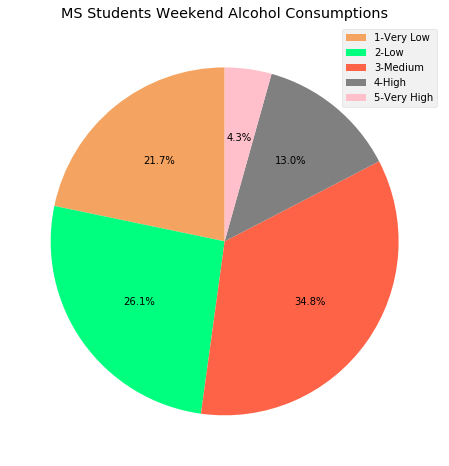

In [138]:
MS_weekend= list(map(lambda l: list(MS.Walc).count(l),l))
plt.figure(figsize=(8,8))
plt.pie(MS_weekend,colors=colors2,autopct='%1.1f%%', startangle=90)
plt.title("MS Students Weekend Alcohol Consumptions")
plt.legend(labels)
plt.show()

## Urban or Rural

In [139]:
urban=student_mat_dataframe[student_mat_dataframe.address=="U"]
rural= student_mat_dataframe[student_mat_dataframe.address=="R"]

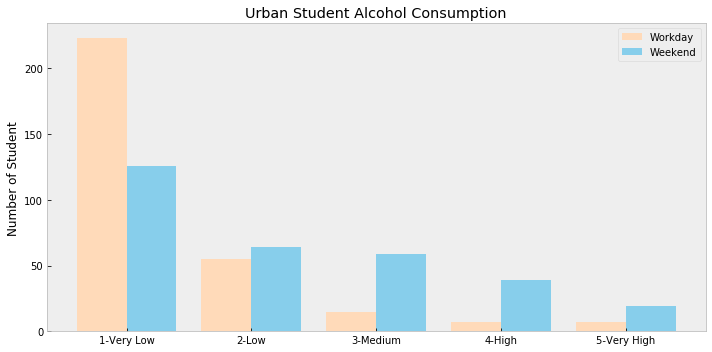

In [140]:
urban_workday=list(map(lambda l: list(urban.Dalc).count(l),l))
urban_weekend=list(map(lambda l: list(urban.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)   
w = 0.4   

plot1= plt.bar(i, urban_workday, w, color="peachpuff")
plot2= plt.bar(i+w, urban_weekend, w, color="skyblue" )

plt.ylabel('Number of Student')
plt.title('Urban Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.grid()
plt.show()

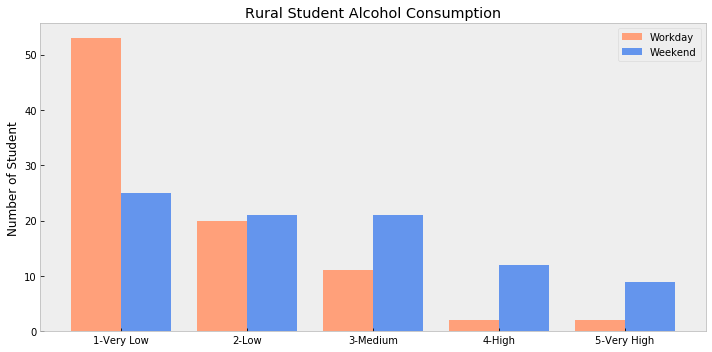

In [141]:
rural_workday=list(map(lambda l: list(rural.Dalc).count(l),l))
rural_weekend=list(map(lambda l: list(rural.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4 
p1= plt.bar(i, rural_workday, w, color="lightsalmon")
p2= plt.bar(i+w,rural_weekend, w, color="cornflowerblue" )

plt.ylabel('Number of Student')
plt.title('Rural Student Alcohol Consumption')
plt.xticks(i+w/2, labels)
plt.legend((p1[0],p2[0]),("Workday","Weekend"))
plt.tight_layout()
plt.grid()
plt.show()

In [142]:
describe_conclusion = {"Feature": ["All Students","Age 15","Age 16","Age 17","Age 18", "Age 19", "Age 20", "Age 21", "Female","Male","GP","MS","Urban","Rural"],
    "Count": [student_mat_dataframe.shape[0],age15.shape[0],age16.shape[0],age17.shape[0],age18.shape[0],age19.shape[0],age20.shape[0],age21.shape[0],female.shape[0],male.shape[0],GP.shape[0],MS.shape[0],urban.shape[0],rural.shape[0]],
    "Average Working Day Alcohol Consumption": [student_mat_dataframe.Dalc.mean(),age15.Dalc.mean(),age16.Dalc.mean(),age17.Dalc.mean(),age18.Dalc.mean(),age19.Dalc.mean(),age20.Dalc.mean(),age21.Dalc.mean(),female.Dalc.mean(),male.Dalc.mean(),GP.Dalc.mean(),MS.Dalc.mean(),urban.Dalc.mean(),rural.Dalc.mean()],
    "Average Weekend Alcohol Consumption": [student_mat_dataframe.Walc.mean(),age15.Walc.mean(),age16.Walc.mean(),age17.Walc.mean(),age18.Walc.mean(),age19.Walc.mean(),age20.Walc.mean(),age21.Walc.mean(),female.Walc.mean(),male.Walc.mean(),GP.Walc.mean(),MS.Walc.mean(),urban.Walc.mean(),rural.Walc.mean()]}

In [143]:
df=pd.DataFrame(describe_conclusion)

In [144]:
df

,Feature,Count,Average Working Day Alcohol Consumption,Average Weekend Alcohol Consumption
0,All Students,395,1.481013,2.291139
1,Age 15,82,1.353659,1.902439
2,Age 16,104,1.432692,2.278846
3,Age 17,98,1.520408,2.571429
4,Age 18,82,1.548780,2.414634
5,Age 19,24,1.458333,1.958333
6,Age 20,3,2.000000,2.333333
7,Age 21,1,3.000000,3.000000
8,Female,208,1.254808,1.956731
9,Male,187,1.732620,2.663102
